# Use to Check Reproducibility - v2.1 Code

Version 2.1 relies on conda environment built from yaml file `fmda/install/fmda_ml.yml`. This environment uses python version `>=3.12` tensorflow version `>=2.16`. This led to substantial changes from the old reproducibility for code v2.0, so those old reproducibility hashes are no longer supported.

To see old code and reproduciblity results, see commit "911c6d7a" or PR#11.

## Setup

In [1]:
# Environment
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
# Local modules
sys.path.append('..')
from moisture_rnn import RNN, RNNParams, RNNData
import reproducibility
from utils import print_dict_summary, read_yml, read_pkl
from moisture_rnn_pkl import pkl2train
from moisture_rnn import RNN, RNNData, RNNParams
import logging
from utils import logging_setup
logging_setup()

### Reproducibility Dataset

In [2]:
# Original File
repro_file='../data/reproducibility_dict_v2_TEST.pkl'
repro = read_pkl(repro_file)

loading file ../data/reproducibility_dict_v2_TEST.pkl


## RNN with Stateful Batch Training


In [3]:
# Set up params
params = repro['repro_info']['params']
print(type(params))
print(params)

<class 'moisture_rnn.RNNParams'>
{'batch_size': 32, 'timesteps': 5, 'optimizer': 'adam', 'rnn_layers': 1, 'rnn_units': 20, 'dense_layers': 1, 'dense_units': 5, 'activation': ['linear', 'linear'], 'centering': [0.0, 0.0], 'dropout': [0.2, 0.2], 'recurrent_dropout': 0.2, 'reset_states': True, 'batch_reset': None, 'epochs': 300, 'learning_rate': 0.001, 'clipvalue': 10.0, 'phys_initialize': False, 'stateful': True, 'verbose_weights': True, 'verbose_fit': False, 'features_list': ['Ed', 'Ew', 'solar', 'wind', 'rain'], 'scale': True, 'scaler': 'minmax', 'train_frac': 0.5, 'val_frac': 0.2, 'early_stopping_patience': 9999, 'n_features': 5, 'batch_shape': (32, 5, 5)}


In [4]:
# Set up input data
rnn_dat = RNNData(repro, scaler = params['scaler'], features_list = params['features_list'])
rnn_dat.train_test_split(
    train_frac = params['train_frac'],
    val_frac = params['val_frac']
)
rnn_dat.scale_data()
rnn_dat.batch_reshape(timesteps = params['timesteps'], batch_size = params['batch_size'])

Input data is single timeseries.
Setting data scaler: minmax
Subsetting input data to features_list: ['Ed', 'Ew', 'solar', 'wind', 'rain']
Train index: 0 to 84
Validation index: 84 to 118
Test index: 118 to 168
X_train shape: (84, 5), y_train shape: (84, 1)
X_val shape: (34, 5), y_val shape: (34, 1)
X_test shape: (50, 5), y_test shape: (50, 1)
Scaling training data with scaler MinMaxScaler(), fitting on X_train
Reshaping training data using batch size: 32 and timesteps: 5
Reshaping validation data using batch size: 32 and timesteps: 5


resetting random seeds to 123
Initial Weights Hash: 16dd16c405f43639f265ad95490dacfb
Input data hashes, NOT formatted for rnn sequence/batches yet
Hash of X: d9d7eb7c6a5ff551cbb35bc9c92dec81
Hash of y: 7e842f81d22a4f0aa74e6ed1b41e4330
Hash of X_train: a901f674d0059cde6049241699d2c667
Hash of y_train: 2cfc870d0b0128be402835a41e855609
Hash of X_val: 597ca522272167b6642514958d2b97a8
Hash of y_val: cb6d974a60a10be5aee64cdd9b192ac1
Hash of X_test: ec82668a812a853d4a9e083b76515c5e
Hash of y_test: 5c09107d58439eb3ee8274cda8ac2a49
Training simple RNN with params: {'batch_size': 32, 'timesteps': 5, 'optimizer': 'adam', 'rnn_layers': 1, 'rnn_units': 20, 'dense_layers': 1, 'dense_units': 5, 'activation': ['linear', 'linear'], 'centering': [0.0, 0.0], 'dropout': [0.2, 0.2], 'recurrent_dropout': 0.2, 'reset_states': True, 'batch_reset': None, 'epochs': 300, 'learning_rate': 0.001, 'clipvalue': 10.0, 'phys_initialize': False, 'stateful': True, 'verbose_weights': True, 'verbose_fit': False, 'features

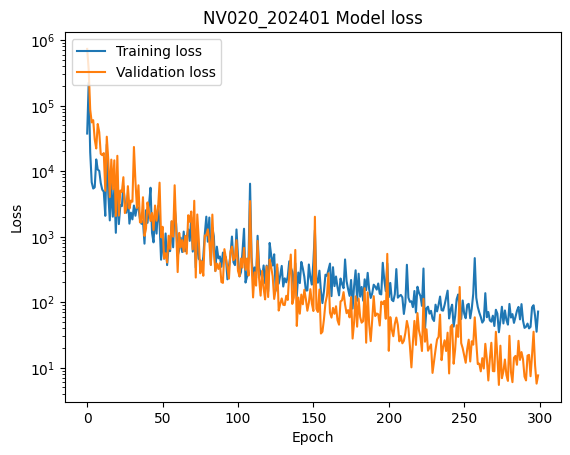

Fitted Weights Hash: 4cf4c9a6c561746cd44abd47825797a2
Scaling all X data with scaler MinMaxScaler(), fitted on X_train
Predicting Training through Test
All X hash: 727c50cca6daaf267889d4cb687d935f
Predicting
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Predictions Hash: 717128f9f9118363f4a6a674b5211133
Checking Reproducibility
Fitted weights hash: 4cf4c9a6c561746cd44abd47825797a2 
 Reproducibility weights hash: 01513ac086d842dc67d40eb94ee1110c
Model predictions hash: 717128f9f9118363f4a6a674b5211133 
 Reproducibility preds hash: 4999d10893207f2b40086e3f84c214a3


C:\Users\jhirs\Documents\Projects\openwfm\notebooks\fmda\version_control\..\moisture_rnn.py:952: UserWarning: The fitted weights hash does not match the reproducibility weights hash.
  warnings.warn("The fitted weights hash does not match the reproducibility weights hash.")
C:\Users\jhirs\Documents\Projects\openwfm\notebooks\fmda\version_control\..\moisture_rnn.py:954: UserWarning: The predictions hash does not match the reproducibility predictions hash.
  warnings.warn("The predictions hash does not match the reproducibility predictions hash.")


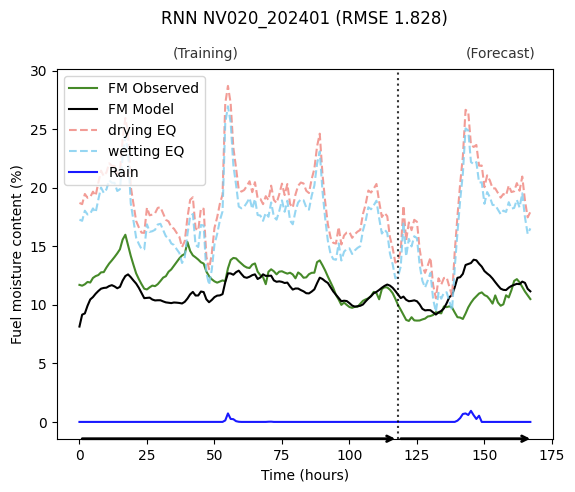

In [5]:
reproducibility.set_seed()
rnn = RNN(params)
m, errs = rnn.run_model(rnn_dat, reproducibility_run=True)

### Physics Initialized

In [ ]:
print("NOT YET IMPLEMENTED")
# params.update({'phys_initialize': True})
# reproducibility.set_seed()
# rnn = RNN(params)
# m, errs = rnn.run_model(rnn_dat)